In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Stocks/tsla.us.txt")

In [6]:
data.head()
data.shape
data.describe()
data.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [7]:
training_size = int(len(data)*0.80)
data_len = len(data)

In [8]:
train, test = data[0:training_size],data[training_size:data_len]

In [9]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


In [10]:
train = train.loc[:, ["Open"]].values

In [11]:
train

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [30]:
train_scaled


array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [31]:
end_len = len(train_scaled)
end_len

1486

In [32]:
X_train = []
y_train = []
timesteps = 40

In [33]:
for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

In [34]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
train_scaled[0:40,0] #40일간의 시가
train_scaled[40,0] #40+1일째의 

0.01145361470187456

In [36]:
X_train.shape

(1446, 40)

In [37]:
y_train.shape

(1446,)

In [ ]:
#rnn : 입력 데이터의 구조를 3차원으로 해야 함

In [39]:
X_train
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [40]:
X_train.shape
#(1446, 40, 1)
#(데이터개수, time step, dimension)

(1446, 40, 1)

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [42]:
regressor = Sequential()

In [43]:
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [44]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [45]:
epochs = 100 
batch_size = 20

In [46]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 4s 14ms/step - loss: 0.3037
Epoch 2/100
73/73 [==============================] - 1s 14ms/step - loss: 0.1546
Epoch 3/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0868
Epoch 4/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0717
Epoch 5/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0517
Epoch 6/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0382
Epoch 7/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0335
Epoch 8/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0259
Epoch 9/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0236
Epoch 10/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0217
Epoch 11/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0175
Epoch 12/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0174
Epoch 13/100
73/73 [=====

In [47]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [48]:
real_price = test.loc[:, ["Open"]].values


In [53]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)


In [54]:
dataset_total

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [61]:
inputs=dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)
inputs.shape

(412, 1)

In [62]:
inputs=scaler.transform(inputs)

In [63]:
inputs

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [64]:
print("Test length --> ", len(test))

Test length -->  372


In [65]:
X_test=[]
for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])

In [66]:
X_test=np.array(X_test)

In [67]:
print(X_test.shape)

(372, 40)


In [68]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [69]:
pred=regressor.predict(X_test)

12/12 [==============================] - 0s 7ms/step


In [71]:
pred
pred.shape

(372, 1)

In [72]:
pred

array([[0.9637649 ],
       [0.8594023 ],
       [0.7855022 ],
       [0.764246  ],
       [0.7878977 ],
       [0.7904644 ],
       [0.78002834],
       [0.7620703 ],
       [0.76881444],
       [0.76955044],
       [0.7559483 ],
       [0.77365136],
       [0.79651535],
       [0.79395103],
       [0.7695346 ],
       [0.7419877 ],
       [0.7439585 ],
       [0.7493738 ],
       [0.73774815],
       [0.7319611 ],
       [0.74477315],
       [0.7123854 ],
       [0.67214215],
       [0.65085506],
       [0.6410068 ],
       [0.66235065],
       [0.68813014],
       [0.7077248 ],
       [0.70476377],
       [0.70951056],
       [0.7076198 ],
       [0.7154213 ],
       [0.7223793 ],
       [0.7382918 ],
       [0.75409746],
       [0.7599542 ],
       [0.753727  ],
       [0.7511591 ],
       [0.75221705],
       [0.7638419 ],
       [0.77615047],
       [0.779462  ],
       [0.7721742 ],
       [0.77057815],
       [0.77731866],
       [0.7876049 ],
       [0.7898262 ],
       [0.792

In [73]:
pred=scaler.inverse_transform(pred)
pred

array([[277.8311 ],
       [249.49352],
       [229.42741],
       [223.65572],
       [230.07787],
       [230.77481],
       [227.9411 ],
       [223.06496],
       [224.8962 ],
       [225.09604],
       [221.40265],
       [226.20956],
       [232.41782],
       [231.72153],
       [225.09174],
       [217.61192],
       [218.14705],
       [219.61748],
       [216.46075],
       [214.88939],
       [218.36826],
       [209.57402],
       [198.64676],
       [192.86668],
       [190.1926 ],
       [195.98808],
       [202.98798],
       [208.30852],
       [207.50452],
       [208.79341],
       [208.28001],
       [210.39836],
       [212.28766],
       [216.60838],
       [220.90009],
       [222.49037],
       [220.7995 ],
       [220.10223],
       [220.3895 ],
       [223.546  ],
       [226.88814],
       [227.78732],
       [225.80846],
       [225.37509],
       [227.20534],
       [229.99837],
       [230.60152],
       [231.19681],
       [233.93433],
       [233.43462],


In [75]:
real_price.shape

(372, 1)

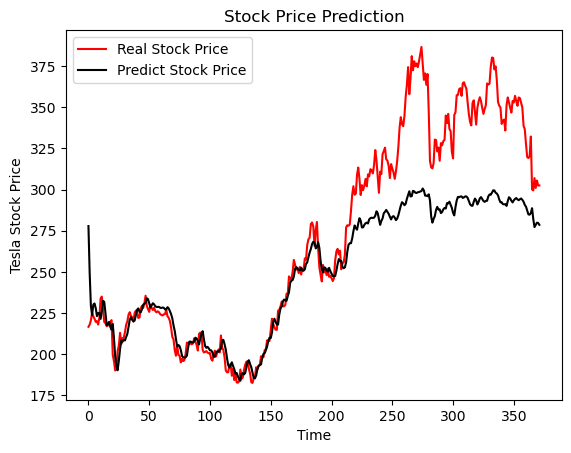

In [77]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(pred, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

In [ ]:
#1. LSTM 변경하고 RNN과 비교
#2. 관심있는 회사에 대해 예측모델